Librerìas

In [1]:
import pandas as pd
from qgrid import show_grid

Archivo csv

In [2]:
data=pd.read_csv('data/german_credit_data.csv',sep=',')

In [3]:
show_grid(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

1.2 Estado de salud del dataframe

In [4]:
from funpymodeling.exploratory import freq_tbl,status,profiling_num

In [5]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.000,0,0.000,53,int64
1,Sex,0,0.000,0,0.000,2,object
2,Job,0,0.000,22,0.022,4,int64
3,Housing,0,0.000,0,0.000,3,object
4,Saving_accounts,183,0.183,0,0.000,4,object
5,Checking_account,394,0.394,0,0.000,3,object
6,Credit_amount,0,0.000,0,0.000,921,int64
7,Duration,0,0.000,0,0.000,33,int64
8,Purpose,0,0.000,0,0.000,8,object
9,Risk,0,0.000,0,0.000,2,object


1.3 Variables Numèricas

Graficos/Histogramas

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Job'}>],
       [<AxesSubplot:title={'center':'Credit_amount'}>,
        <AxesSubplot:title={'center':'Duration'}>]], dtype=object)

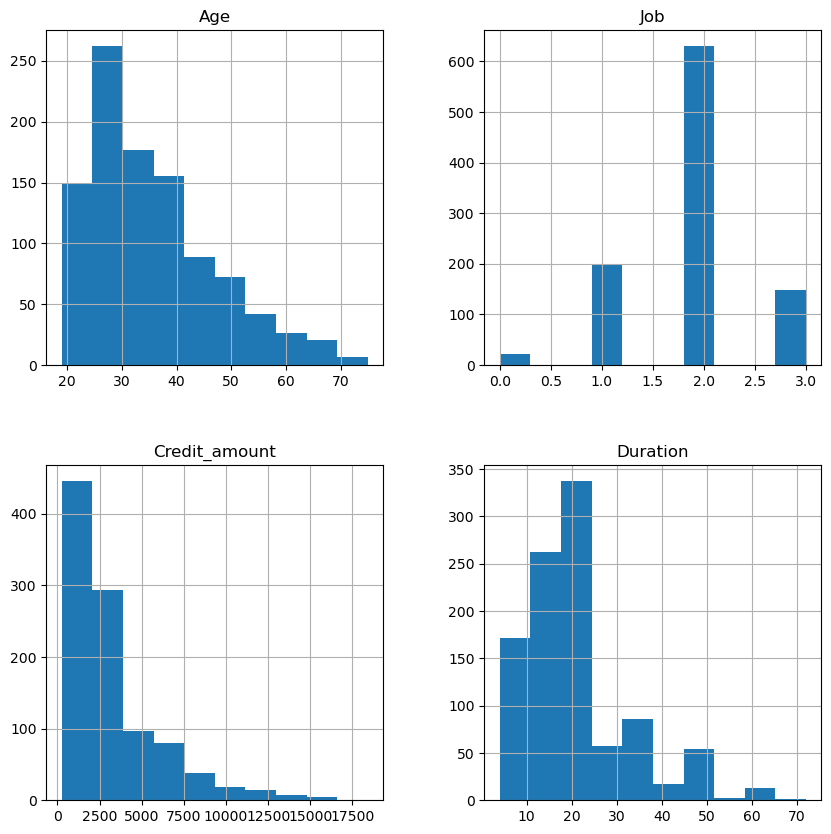

In [6]:
data.hist(figsize=(10,10))

In [7]:
data['Job']=data['Job'].astype('str')
status(data['Job'])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Job,0,0.0,0,0.0,4,object


Analisis cuantitavivo/descripcion estadistica:

In [8]:
profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Age,35.546,11.375469,0.320021,20.00,22.00,27.0,33.0,42.00,60.0,67.01
1,Credit_amount,3271.258,2822.736876,0.862890,425.83,708.95,1365.5,2319.5,3972.25,9162.7,14180.39
2,Duration,20.903,12.058814,0.576894,6.00,6.00,12.0,18.0,24.00,48.0,60.00


1.4 Analisis de variables categoricas

In [9]:
freq_tbl(data['Job'])

,Job,frequency,percentage,cumulative_perc
0,2,630,0.630,0.630
1,1,200,0.200,0.830
2,3,148,0.148,0.978
3,0,22,0.022,1.000


In [10]:
freq_tbl(data)

      Sex  frequency  percentage  cumulative_perc
0    male        690        0.69             0.69
1  female        310        0.31             1.00

----------------------------------------------------------------

  Job  frequency  percentage  cumulative_perc
0   2        630       0.630            0.630
1   1        200       0.200            0.830
2   3        148       0.148            0.978
3   0         22       0.022            1.000

----------------------------------------------------------------

  Housing  frequency  percentage  cumulative_perc
0     own        713       0.713            0.713
1    rent        179       0.179            0.892
2    free        108       0.108            1.000

----------------------------------------------------------------

  Saving_accounts  frequency  percentage  cumulative_perc
0          little        603       0.603         0.738066
1        moderate        103       0.103         0.864137
2      quite rich         63       0.063     

Graficos de Barras

In [11]:
from funpymodeling.exploratory import cat_vars,num_vars

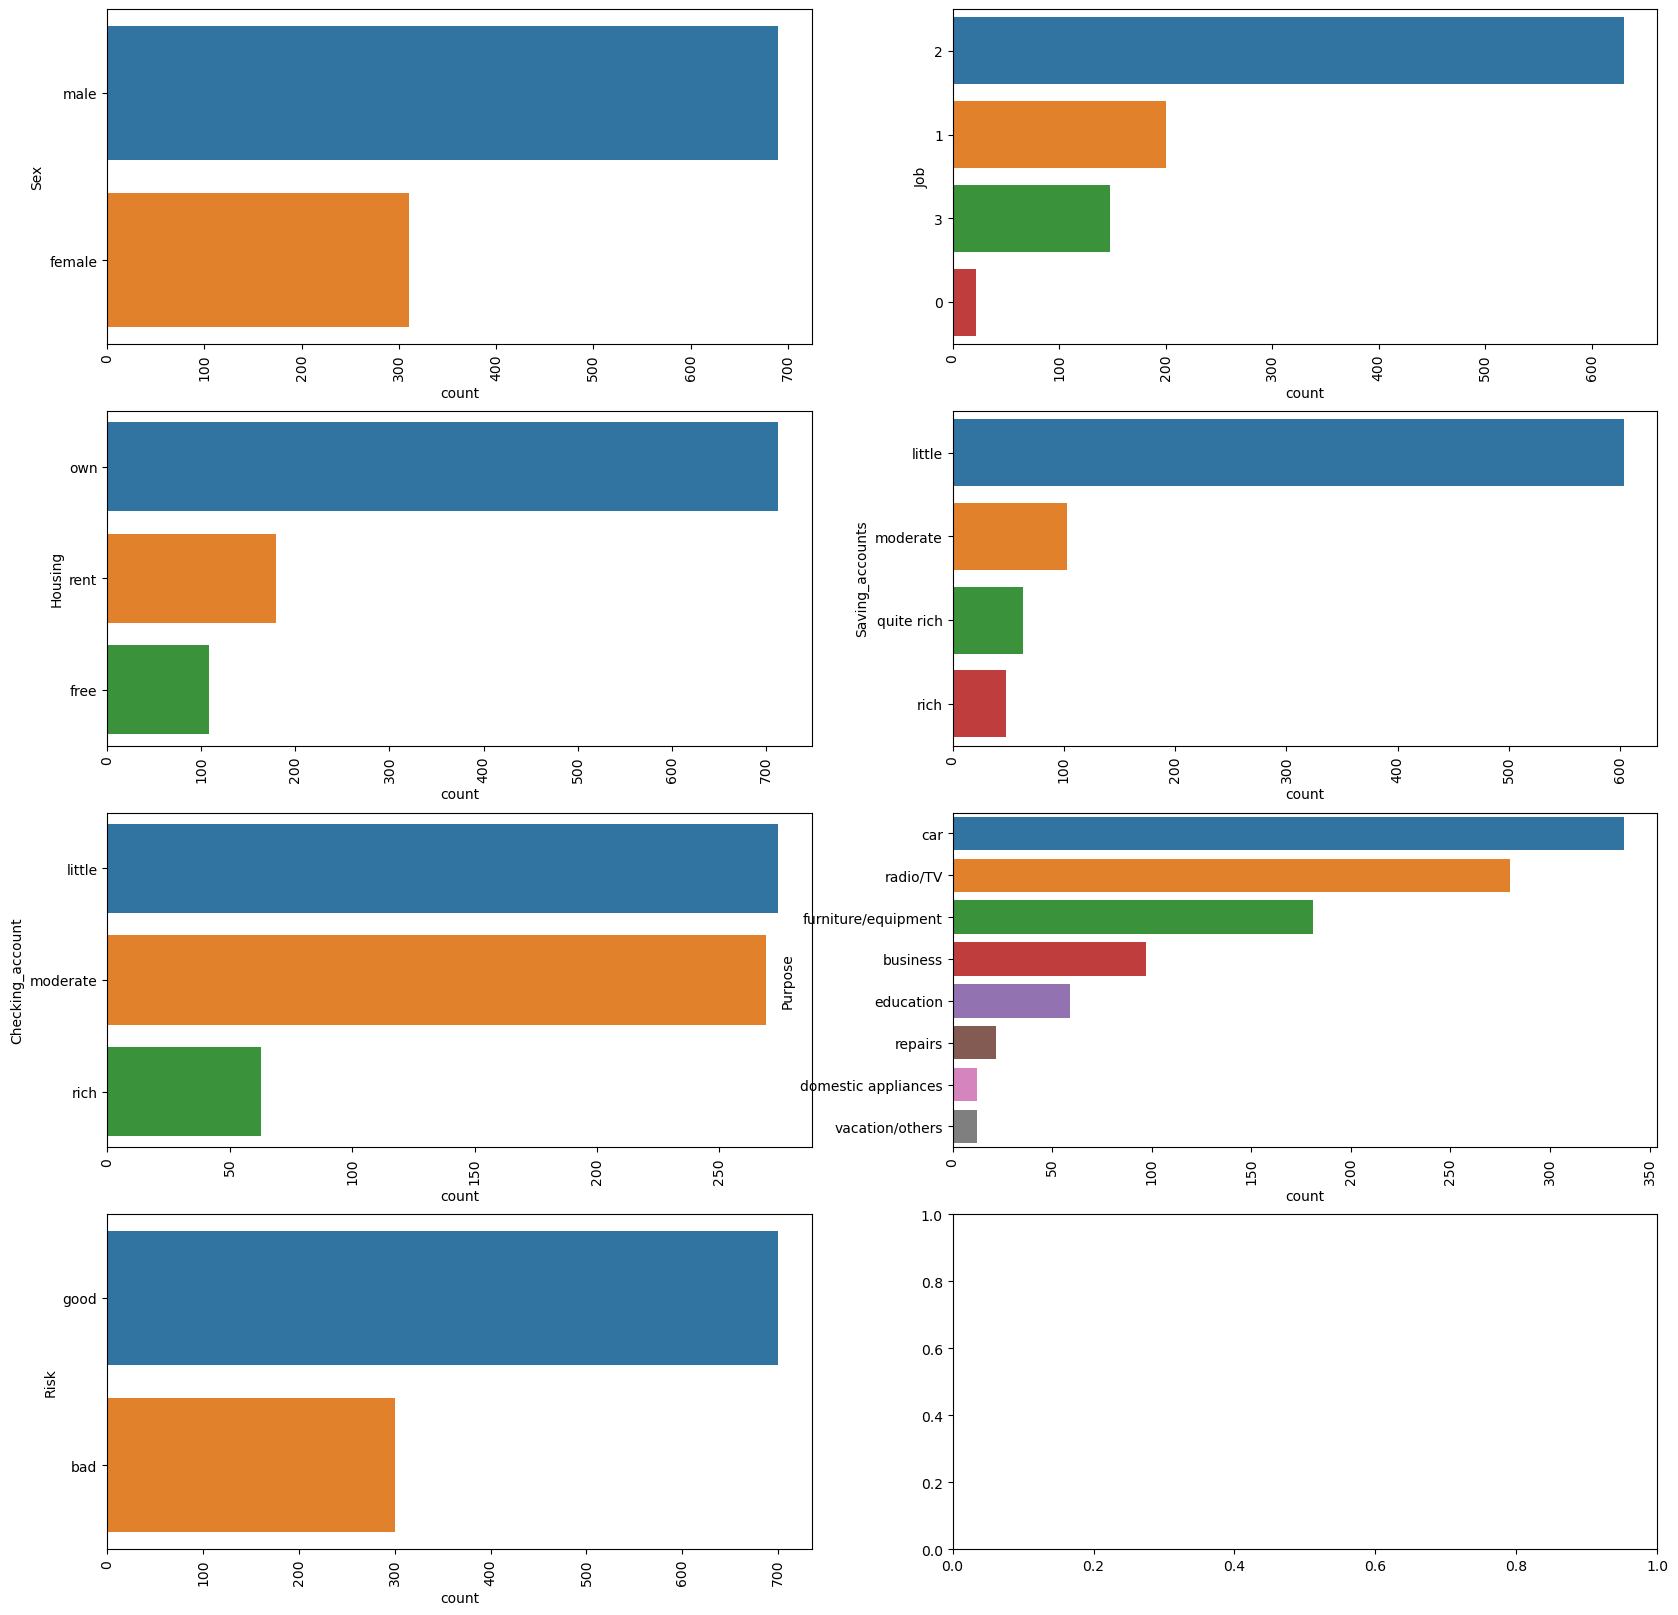

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
d_plot=data
fig,ax=plt.subplots(4,2,figsize=(20,20))
for variable,subplot in zip(cat_vars(d_plot),ax.flatten()):
    sns.countplot(y=d_plot[variable],ax=subplot,order=d_plot[variable].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

2. Analisis Exploratorio de datos-Analisis Bivariado

2.A. Categorica vs categorica

In [13]:
pd.crosstab(data.Saving_accounts,data.Risk)

Risk,bad,good
Saving_accounts,,
little,217,386
moderate,34,69
quite rich,11,52
rich,6,42


In [14]:
pd.crosstab(data.Saving_accounts,data.Risk, margins=True)

Risk,bad,good,All
Saving_accounts,,,
little,217,386,603
moderate,34,69,103
quite rich,11,52,63
rich,6,42,48
All,268,549,817


Porcentages totales( suma de celdas 100%)

In [15]:
pd.crosstab(data.Saving_accounts,data.Risk,normalize=True)

Risk,bad,good
Saving_accounts,,
little,0.265606,0.472460
moderate,0.041616,0.084455
quite rich,0.013464,0.063647
rich,0.007344,0.051408


Porcentages por registro(util para selecciòn de variables)

In [16]:
pd.crosstab(data.Saving_accounts,data.Risk, normalize='index',margins=True)

Risk,bad,good
Saving_accounts,,
little,0.359867,0.640133
moderate,0.330097,0.669903
quite rich,0.174603,0.825397
rich,0.125000,0.875000
All,0.328029,0.671971


Evitar sesgos por representatividad(caso rich

In [17]:
pd.crosstab(data['Saving_accounts'],data['Risk'],margins=True, normalize=True)

Risk,bad,good,All
Saving_accounts,,,
little,0.265606,0.472460,0.738066
moderate,0.041616,0.084455,0.126071
quite rich,0.013464,0.063647,0.077111
rich,0.007344,0.051408,0.058752
All,0.328029,0.671971,1.000000


2.B. Analisis de numèrica vs catègorico

In [18]:
data.groupby('Purpose')['Age'].mean()

Purpose
business               35.484536
car                    37.139466
domestic appliances    34.250000
education              38.288136
furniture/equipment    32.458564
radio/TV               34.700000
repairs                38.545455
vacation/others        39.916667
Name: Age, dtype: float64

In [19]:
data.groupby('Purpose')['Age'].mean().sort_values(ascending=False)

Purpose
vacation/others        39.916667
repairs                38.545455
education              38.288136
car                    37.139466
business               35.484536
radio/TV               34.700000
domestic appliances    34.250000
furniture/equipment    32.458564
Name: Age, dtype: float64

In [20]:
data.groupby('Purpose')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Purpose,,,,,,,,
business,97.0,35.484536,11.401858,21.0,27.0,33.0,39.00,74.0
car,337.0,37.139466,11.649960,20.0,28.0,35.0,43.00,75.0
domestic appliances,12.0,34.250000,13.376540,22.0,24.0,28.0,39.50,62.0
education,59.0,38.288136,11.555042,21.0,30.5,36.0,46.50,67.0
furniture/equipment,181.0,32.458564,9.747632,19.0,25.0,30.0,39.00,63.0
radio/TV,280.0,34.700000,11.142736,20.0,26.0,32.0,40.25,67.0
repairs,22.0,38.545455,14.879603,22.0,25.5,33.5,48.00,67.0
vacation/others,12.0,39.916667,11.325421,27.0,30.5,39.5,45.00,60.0


In [21]:
data.groupby('Risk').mean()

/tmp/ipykernel_5973/1312397723.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Risk').mean()


,Age,Credit_amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


2.C. Analisis de numèrica vs. numèrica

3.GRAFICOS EN ANÀLISIS EXPLORATORIO DE DATOS BIVARIADO

3.A. Analisis de numèrica vs. categòrica

<AxesSubplot:xlabel='Purpose', ylabel='Age'>

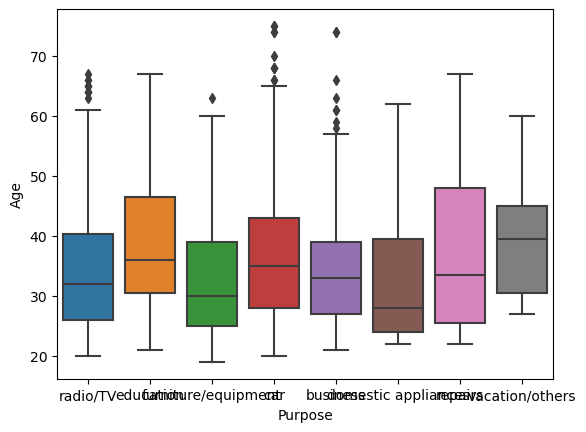

In [22]:
import seaborn as sns
sns.boxplot(y='Age',x='Purpose',data=data)

<AxesSubplot:xlabel='Purpose', ylabel='Age'>

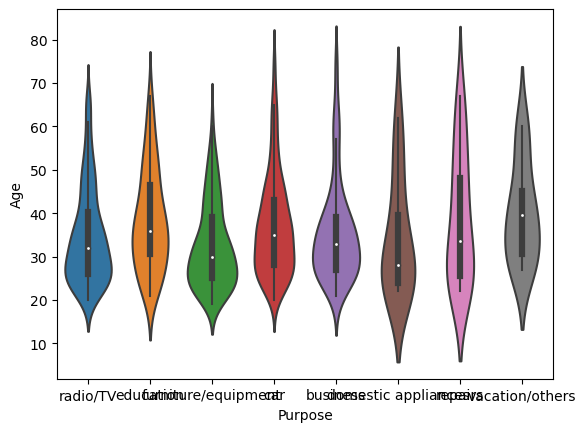

In [23]:
sns.violinplot(y='Age',x='Purpose',data=data)

3.B. Anàlisis de categòrica vs. categòrica

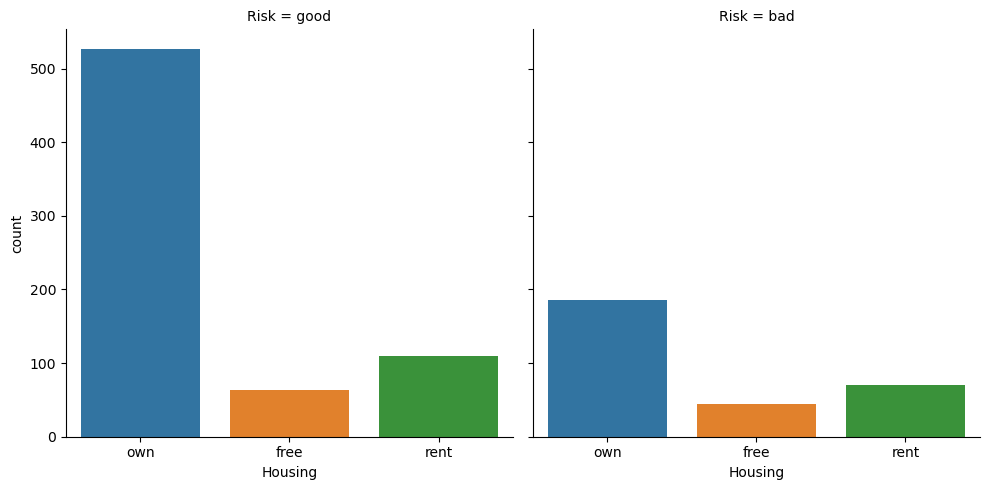

In [24]:
g=sns.catplot(x='Housing',
             col='Risk',
             data=data,
             kind='count')